In [40]:
%matplotlib inline
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from matplotlib.pyplot import hist
import numpy as np

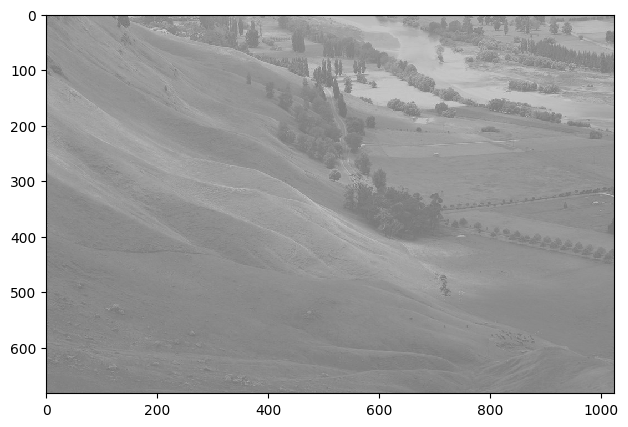

In [4]:
img = imread('landscape.png')
imshow(img)

In [55]:
values, bin_edges = np.histogram(img.ravel(), bins=range(257))
values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,     1,    12,
          19,    49,    93,   220,   488,  1061,  1747,  2160,  2718,
        3259,  4039,

In [17]:
img

array([[127, 145, 149, ..., 168, 167, 166],
       [165, 152, 143, ..., 168, 169, 168],
       [171, 145, 140, ..., 156, 154, 151],
       ...,
       [147, 132, 134, ..., 146, 145, 144],
       [146, 130, 132, ..., 146, 145, 144],
       [145, 128, 129, ..., 146, 145, 144]], dtype=uint8)

In [56]:
def cdf(arr, x):
    return (sum([arr[i] for i in range (x+1)]))
m = min([cdf(values,i)  for i in range(256) if cdf(values,i)!=0])
m

1

In [57]:
img.shape[0], img.shape[1]

(683, 1024)

In [58]:

result

array([[  6., 130., 157., ..., 233., 231., 229.],
       [227., 177., 115., ..., 233., 235., 233.],
       [237., 130.,  91., ..., 199., 189., 170.],
       ...,
       [144.,  22.,  35., ..., 137., 130., 122.],
       [137.,  13.,  22., ..., 137., 130., 122.],
       [130.,   8.,  10., ..., 137., 130., 122.]])

In [59]:
result = np.zeros((img.shape[0], img.shape[1]))
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        result[row][col] = (cdf(values, img[row][col])-m)/(img.size-1)
        result[row][col] *= 255  # or result[row][col] = result[row][col] * 255
result = result.round()
result


array([[  6., 130., 157., ..., 233., 231., 229.],
       [227., 177., 115., ..., 233., 235., 233.],
       [237., 130.,  91., ..., 199., 189., 170.],
       ...,
       [144.,  22.,  35., ..., 137., 130., 122.],
       [137.,  13.,  22., ..., 137., 130., 122.],
       [130.,   8.,  10., ..., 137., 130., 122.]])

/opt/homebrew/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


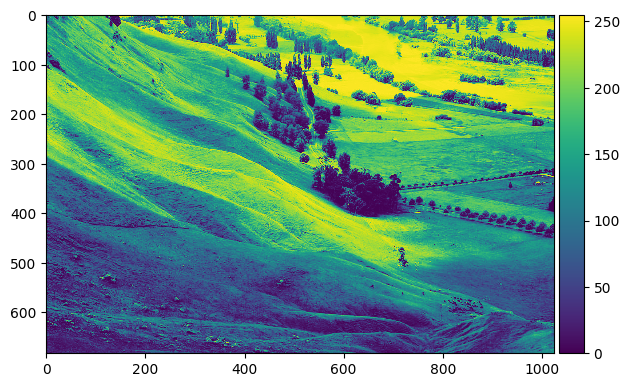

In [60]:
imshow(result)

In [46]:
imsave("out.png", result)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


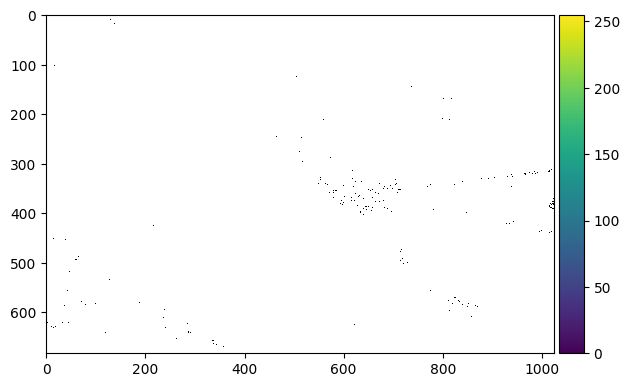

In [37]:
imshow(np.dstack((result,result,result)))

In [14]:
img = (cdf(values,img)-m)/(img.size-1)
img =round(img*255)

TypeError: only integer scalar arrays can be converted to a scalar index

In [63]:
# Compute the cumulative distribution function
# Compute the histogram of pixel intensities
values, bin_edges = np.histogram(img.ravel(), bins=range(257))

# Compute the cumulative distribution function (CDF) of the pixel intensities
cdf = np.cumsum(values)

# Find the minimum non-zero value of the CDF
m = cdf[np.nonzero(cdf)].min()

# Normalize the CDF to the range [0, 255]
norm_cdf = ((cdf - m) / (img.size - 1)) * 255

# Compute the output image using the normalized CDF
result = np.interp(img.ravel(), bin_edges[:-1], norm_cdf).reshape(img.shape).round()

result.astype('uint')

array([[  6, 130, 157, ..., 233, 231, 229],
       [227, 177, 115, ..., 233, 235, 233],
       [237, 130,  91, ..., 199, 189, 170],
       ...,
       [144,  22,  35, ..., 137, 130, 122],
       [137,  13,  22, ..., 137, 130, 122],
       [130,   8,  10, ..., 137, 130, 122]], dtype=uint64)